
**PROJECT: HOUSE PRICE PREDICTION USING REGRESSION**

**Problem Statement:**

Manual house price estimations based on features like size, rooms, and location are unreliable.
I aim to build a machine learning regression model to predict house prices more accurately.

Approach:
- Clean and preprocess Bengaluru housing data
- Handle outliers and missing values
- Apply Linear, Lasso, and Ridge regression
- Evaluate performance using R² score


In [1]:
#Importing the pandas library
import pandas as pd
#Reading the data from the csv file
input_file="/content/Bengaluru_House_Data[1].csv"
df=pd.read_csv(input_file)

In [2]:
#Printing the first five rows
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
#Printing the number of rows and column in the dataset
print("The total number of rows is",df.shape[0])
print("The total number of columns is",df.shape[1])

The total number of rows is 13320
The total number of columns is 9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [5]:
#Display value count for each column
for col in df.columns:
  print(df[col].value_counts())
  print("____________________________________________________________________________________________"*2)

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64
________________________________________________________________________________________________________________________________________________________________________________________
availability
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
16-Oct               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: count, Length: 81, dtype: int64
________________________________________________________________________________________________________________________________________________________________________________________
location
Whitefield                         540
Sarjapur  Road                     399
Electronic City                    302
Kanakpura Road                     273
Thanisand

In [6]:
#Checking the null values in each column in the dataset
df.isnull().sum()

,0
area_type,0
availability,0
location,1
size,16
society,5502
total_sqft,0
bath,73
balcony,609
price,0


In [7]:
#Dropping the "area_type","society","balcony","availability" columns
df.drop(columns=["area_type","society","balcony","availability"],inplace=True)

In [ ]:
df.sample(5)

,location,size,total_sqft,bath,price
12322,Harlur,2 BHK,936,2.0,45.0
7595,Hosur Road,4 Bedroom,2000,4.0,69.0
2278,Frazer Town,3 BHK,1750,3.0,150.0
1883,Sector 2 HSR Layout,3 BHK,1450,2.0,135.0
10243,Subramanyapura,2 BHK,1000,2.0,45.0


In [8]:
#Decribing the dataset
df.describe()

,bath,price
count,13247.000000,13320.000000
mean,2.692610,112.565627
std,1.341458,148.971674
min,1.000000,8.000000
25%,2.000000,50.000000
50%,2.000000,72.000000
75%,3.000000,120.000000
max,40.000000,3600.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13319 non-null  object 
 1   size        13304 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [10]:
#Checking the null values in each column
df.isnull().sum()

,0
location,1
size,16
total_sqft,0
bath,73
price,0


In [11]:
df

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [12]:
#Checking the values and their frequency in location column
df["location"].value_counts()

,count
location,
Whitefield,540
Sarjapur Road,399
Electronic City,302
Kanakpura Road,273
Thanisandra,234
...,...
3rd Stage Raja Rajeshwari Nagar,1
Chuchangatta Colony,1
"Electronic City Phase 1,",1


In [13]:
#Imputing the missing values of location column with the most repeated value(mode)
df["location"]=df["location"].fillna("Whitefield")

In [14]:
#Checking the values and their frequency in size column
df["size"].value_counts()

,count
size,
2 BHK,5199
3 BHK,4310
4 Bedroom,826
4 BHK,591
3 Bedroom,547
1 BHK,538
2 Bedroom,329
5 Bedroom,297
6 Bedroom,191


In [15]:
#Imputing the missing values of size column with mode
df["size"]=df["size"].fillna("2 BHK")

In [16]:
#Imputing the missing values of bath column with the median
df["bath"]=df["bath"].fillna(df["bath"].median())

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13320 non-null  object 
 1   size        13320 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13320 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [18]:
#Extracting "bhk" from size
df["bhk"]=df["size"].str.split().str.get(0).astype(float)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13320 non-null  object 
 1   size        13320 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13320 non-null  float64
 4   price       13320 non-null  float64
 5   bhk         13320 non-null  float64
dtypes: float64(3), object(3)
memory usage: 624.5+ KB


In [20]:
def convert_range(val):
  temp=str(val).split("-")
  if len(temp)==2:
    return (float(temp[0])+ float(temp[1]))/2
  try:
    return float(val)
  except:
    return None

In [21]:
#Converting the "total_sqrt" column into the range
df["total_sqft"]=df["total_sqft"].apply(convert_range)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13320 non-null  object 
 1   size        13320 non-null  object 
 2   total_sqft  13274 non-null  float64
 3   bath        13320 non-null  float64
 4   price       13320 non-null  float64
 5   bhk         13320 non-null  float64
dtypes: float64(4), object(2)
memory usage: 624.5+ KB


In [23]:
#Creating a new feature "price_per_squarefeet"
df["price_per_sqft"] = df["price"] * 100000 / df["total_sqft"]

In [24]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13274.000000,13320.000000,13320.000000,13320.000000,1.327400e+04
mean,1559.626694,2.688814,112.565627,2.802778,7.907501e+03
std,1238.405258,1.338754,148.971674,1.294496,1.064296e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.266865e+03
50%,1276.000000,2.000000,72.000000,3.000000,5.434306e+03
75%,1680.000000,3.000000,120.000000,3.000000,7.311746e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [25]:
# Removing extra spaces in location strings
df["location"]=df["location"].apply(lambda x:x.strip())
location_count=df["location"].value_counts()

In [26]:
location_count

,count
location,
Whitefield,542
Sarjapur Road,399
Electronic City,304
Kanakpura Road,273
Thanisandra,237
...,...
Duddanahalli,1
Doddanakunte,1
Jogupalya,1


In [27]:
#printing the location that have frequency less than 10
location_count_less_10=location_count[location_count<=10]
location_count_less_10

,count
location,
Basapura,10
Dairy Circle,10
Nagappa Reddy Layout,10
Naganathapura,10
Sector 1 HSR Layout,10
...,...
Duddanahalli,1
Doddanakunte,1
Jogupalya,1


In [28]:
# Grouping locations with <=10 occurrences as 'other'
df["location"]=df["location"].apply(lambda x:'other' if x in location_count_less_10 else x)

In [29]:
df["location"].value_counts()

,count
location,
other,2885
Whitefield,542
Sarjapur Road,399
Electronic City,304
Kanakpura Road,273
...,...
Tindlu,11
Marsur,11
2nd Phase Judicial Layout,11


In [30]:
# Outlier Removal: Based on minimum 300 sqft per BHK
(df["total_sqft"]/df["bhk"]).describe()

,0
count,13274.000000
mean,575.074878
std,388.205175
min,0.250000
25%,473.333333
50%,552.500000
75%,625.000000
max,26136.000000


In [31]:
df=df[((df["total_sqft"]/df["bhk"])>=300)]
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,12530.000000,12530.000000,12530.000000,12530.000000,12530.000000
mean,1594.564544,2.559537,111.382401,2.650838,6303.979357
std,1261.271296,1.077938,152.077329,0.976678,4162.237981
min,300.000000,1.000000,8.440000,1.000000,267.829813
25%,1116.000000,2.000000,49.000000,2.000000,4210.526316
50%,1300.000000,2.000000,70.000000,3.000000,5294.117647
75%,1700.000000,3.000000,115.000000,3.000000,6916.666667
max,52272.000000,16.000000,3600.000000,16.000000,176470.588235


In [32]:
df.shape

(12530, 7)

In [33]:
# Removing outliers based on price per square foot by location
import numpy as np
def remove_outlier_sqft(df):
  df_output=pd.DataFrame()
  for key,subdf in df.groupby('location'):
    m=np.mean(subdf.price_per_sqft)
    st=np.std(subdf.price_per_sqft)

    gen_df=subdf[(subdf.price_per_sqft >(m-st)) & (subdf.price_per_sqft <=(m+st))]
    df_output=pd.concat([df_output,gen_df],ignore_index=True)
  return df_output

df=remove_outlier_sqft(df)
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,10301.000000,10301.000000,10301.000000,10301.000000,10301.000000
mean,1508.440608,2.471702,91.286372,2.574896,5659.062876
std,880.694214,0.979449,86.342786,0.897649,2265.774749
min,300.000000,1.000000,10.000000,1.000000,1250.000000
25%,1110.000000,2.000000,49.000000,2.000000,4244.897959
50%,1286.000000,2.000000,67.000000,2.000000,5175.600739
75%,1650.000000,3.000000,100.000000,3.000000,6428.571429
max,30400.000000,16.000000,2200.000000,16.000000,24509.803922


In [34]:
def bhk_outlier_remove(df):
  exclude_indices=np.array([])
  for location,location_df in df.groupby("location"):
    bhk_stats={}
    for bhk,bhk_df in location_df.groupby('bhk'):
      bhk_stats[bhk]={
          "mean":np.mean(bhk_df.price_per_sqft),
          "std":np.std(bhk_df.price_per_sqft),
          "count":bhk_df.shape[0]
      }
    for bhk,bhk_df in location_df.groupby('bhk'):
      stats=bhk_stats.get(bhk-1)
      if stats and stats['count']>5:
        exclude_indices=np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
  return df.drop(exclude_indices,axis="index")



In [35]:
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4.0,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3.0,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3.0,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3.0,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2.0,11983.805668


In [36]:
#Dropping the columns "size" and "price_per_sqft"
df.drop(columns=["size","price_per_sqft"],inplace=True)

In [37]:
df.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4.0
1,1st Block Jayanagar,1630.0,3.0,194.0,3.0
2,1st Block Jayanagar,1875.0,2.0,235.0,3.0
3,1st Block Jayanagar,1200.0,2.0,130.0,3.0
4,1st Block Jayanagar,1235.0,2.0,148.0,2.0


In [38]:
#Storing the ceaned dataset into a csv file
df.to_csv('Cleaned_data.csv')

In [39]:
#Importing the seaborn library
import seaborn as sns
#Importing the matplotlib library
import matplotlib.pyplot as plt

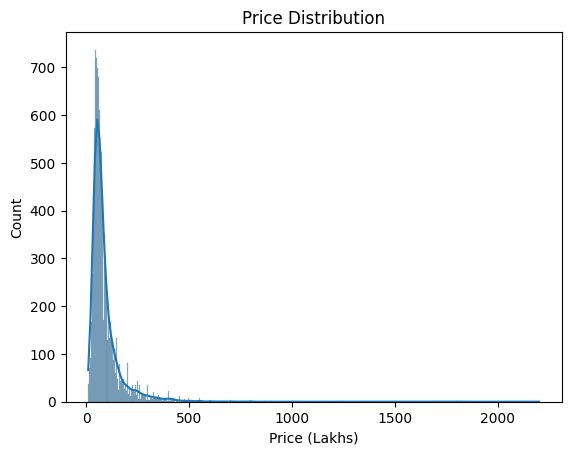

In [40]:
# Price Distribution
sns.histplot(df['price'], kde=True)
#Adding the title to the plot
plt.title("Price Distribution")
#Adding the xlabel to the plot
plt.xlabel("Price (Lakhs)")
#Adiing the ylabel to the plot
plt.ylabel("Count")
#Displaying the plot
plt.show()

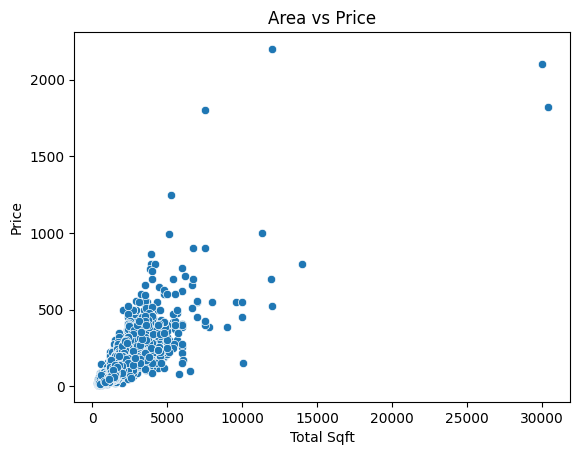

In [41]:

# Area vs Price
sns.scatterplot(x='total_sqft', y='price', data=df)
#Adding the title to the plot
plt.title("Area vs Price")
#Adding the xlabel to the plot
plt.xlabel("Total Sqft")
#Adiing the ylabel to the plot
plt.ylabel("Price")
#Displaying the plot
plt.show()

Text(0.5, 1.0, 'Average Price per BHK')

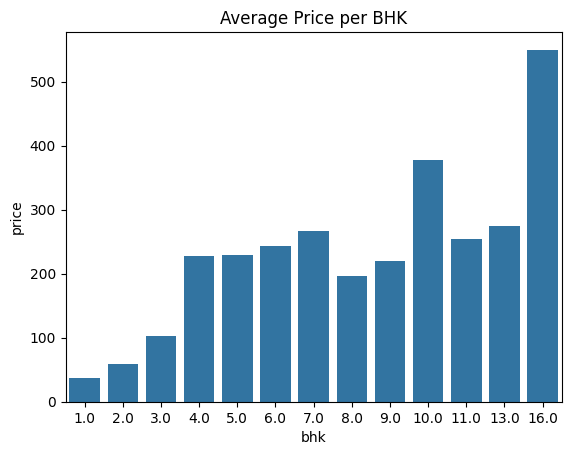

In [42]:
#Bar chart to visualize average price per bhk
avg_price_bhk = df.groupby('bhk')['price'].mean().reset_index()
sns.barplot(x='bhk', y='price', data=avg_price_bhk)
plt.title("Average Price per BHK")


Text(0.5, 1.0, 'BHK vs Total Area')

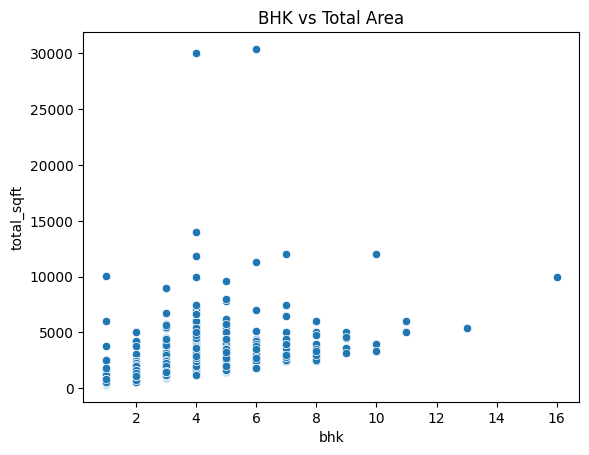

In [43]:
#scatterplot to visualise bhk and total_sqft
sns.scatterplot(x='bhk', y='total_sqft', data=df)
#Adding the title to the plot
plt.title("BHK vs Total Area")

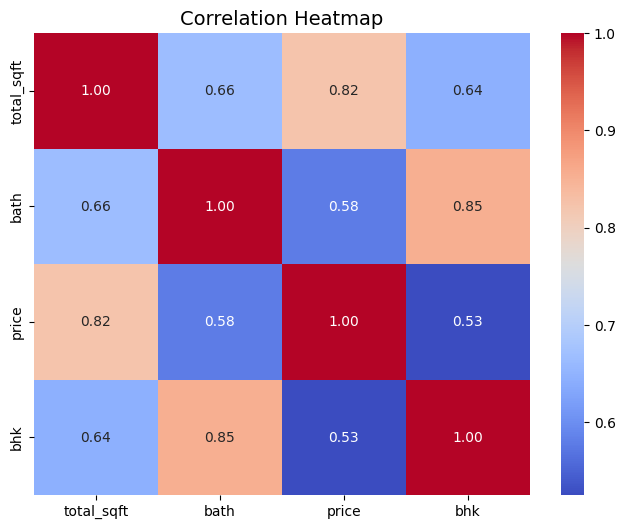

In [44]:
# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap", fontsize=14)
plt.show()


In [45]:
#Feature
X=df.drop(columns=["price"])
#Target
y=df["price"]

In [46]:
#Importing the libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [47]:
#Splitting the data into training and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [48]:
X_train.shape

(8240, 4)

In [49]:
y_train.shape

(8240,)

In [50]:
# Creating column transformer for encoding categorical data
column_trans=make_column_transformer((OneHotEncoder(sparse_output=False),["location"]),remainder="passthrough")

In [51]:
# Feature scaling
scaler=StandardScaler()

In [52]:
# Linear Regression Model Pipeline
lr=LinearRegression()
pipe=make_pipeline(column_trans,scaler,lr)
pipe.fit(X_train,y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [53]:
#Predicted value of linear regression pipeline
y_pred_lr=pipe.predict(X_test)

In [54]:
#r2 score of linear regression pipeline
r2_score(y_test,y_pred_lr)

0.8294581241499306

In [55]:
# Lasso Regression Model Pipeline
lasso=Lasso()
lasso_pipeline=make_pipeline(column_trans,scaler,lasso)
lasso_pipeline.fit(X_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()), ('lasso', Lasso())])

In [56]:
#Predicted value of lasso regression pipeline
y_pred_lasso=lasso_pipeline.predict(X_test)

In [57]:
#r2 score of lasso regression pipeline
r2_score(y_test,y_pred_lasso)

0.8222119691869108

In [58]:
# Ridge Regression Model Pipeline
ridge=Ridge()

ridge_pipeline=make_pipeline(column_trans,scaler,ridge)
ridge_pipeline.fit(X_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()), ('ridge', Ridge())])

In [59]:
#Predicted value of ridge regression pipeline
y_pred_ridge=ridge_pipeline.predict(X_test)

In [60]:
#r2 score of ridge regression pipeline
r2_score(y_test,y_pred_ridge)

0.829455811510804

In [61]:
# Final Model Performance Comparison
print("Linear Regression",r2_score(y_test,y_pred_lr))
print()
print("Lasso",r2_score(y_test,y_pred_lasso))
print()
print("Ridge",r2_score(y_test,y_pred_ridge))

Linear Regression 0.8294581241499306

Lasso 0.8222119691869108

Ridge 0.829455811510804


In [62]:
#Predicting for a new data
new_data = pd.DataFrame({
    "location": ["Whitefield"],
    "total_sqft": [1200],
    "bath": [2],
    "bhk": [3]
})

predicted_price = pipe.predict(new_data)
print("Predicted Price (Lakhs):", predicted_price[0])

Predicted Price (Lakhs): 54.64868614337528



**RESULTS & INSIGHTS:**

- Linear Regression performed best with R² score: {0.8294581241499306}
- Lasso and Ridge slightly underperformed due to regularization effects.
- Location and area are major influencers of price.
- Further improvements can include feature engineering and ensemble models.

**Conclusion:**

The model can help predict housing prices in Bengaluru with reasonable accuracy,
especially in well-represented locations.
